In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Make plots bigger.
plt.rcParams['figure.figsize'] = (14,6)

%matplotlib inline

In [131]:
"""

PROBLEM STATEMENT:

How should we design buildings (with respect to heating load) in the future?

Additional questions:

    1. Is there a relationship between building features and heating load?
    2. How strong is that relationship?
    3. Which are the strongest contributing features to heating load?
    4. Can heating load be predicted given a particular building design?

"""

##################################################################################################
##################################################################################################

"""
The dataset contains eight features (relative _compactness	glazing_area_distribution) 
and two outcomes (heating_load & cooling_load).
The aim is to use the eight features to predict, in this case, one of the two responses (Heating Load).
""" 

df_energy_efficiency = pd.read_excel("../../../data/RCC/ENB2012_data.xlsx", index_col=None)
df_energy_efficiency.columns = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height", "orientation", "glazing_area", "glazing_area_distribution", "heating_load", "cooling_load"]
df_energy_efficiency.head(10)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [132]:
df_energy_efficiency.shape

(768, 10)

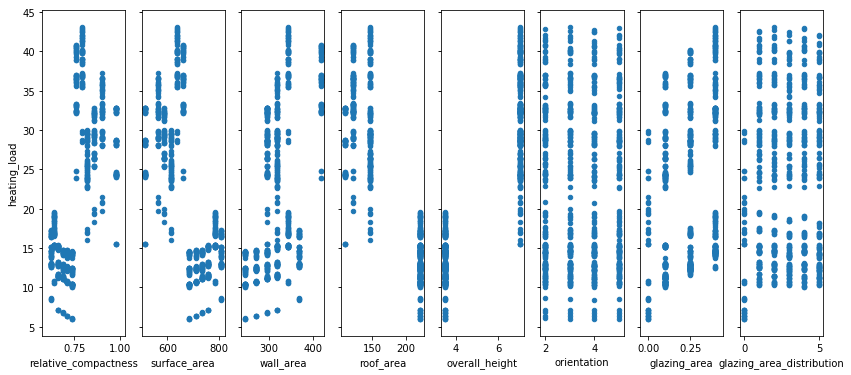

In [133]:
"""Visualize the relationship between the features and the responses."""

fig, axs = plt.subplots(1, 8, sharey=True)
df_energy_efficiency.plot(kind='scatter', x='relative_compactness', y='heating_load', ax=axs[0], figsize=(14, 6))
df_energy_efficiency.plot(kind='scatter', x='surface_area', y='heating_load', ax=axs[1])
df_energy_efficiency.plot(kind='scatter', x='wall_area', y='heating_load', ax=axs[2])
df_energy_efficiency.plot(kind='scatter', x='roof_area', y='heating_load', ax=axs[3])
df_energy_efficiency.plot(kind='scatter', x='overall_height', y='heating_load', ax=axs[4])
df_energy_efficiency.plot(kind='scatter', x='orientation', y='heating_load', ax=axs[5])
df_energy_efficiency.plot(kind='scatter', x='glazing_area', y='heating_load', ax=axs[6])
df_energy_efficiency.plot(kind='scatter', x='glazing_area_distribution', y='heating_load', ax=axs[7])

In [135]:
"""Estimate Model Coefficients for Relative Compactness"""

import statsmodels.formula.api as smf

# Create fitted model.
lm = smf.ols(formula='heating_load ~ relative_compactness', data=df_energy_efficiency).fit()

# Get coefficients.
lm.params

"""FINDINGS: an increase in relative compactness leads to a decrease in heating load."""

'FINDINGS: an increase in relative compactness leads to a decrease in heating load.'

In [136]:
"""
FINDINGS:

    An decrease in Relative Compactness is associated 
    with a 59.359053 "unit" increase in Heating Load.

######################################################

Use model to make predictions (manually).
A 10% increase in overall relative compactness 
translates to a decrease in heating load.
"""

-23.053014+59.359053*10

570.5375160000001

In [137]:
# Create A DataFrame
X_new = pd.DataFrame({'relative_compactness': [10]})
X_new.head()

,relative_compactness
0,10


In [138]:
"""
Use model to make predictions on a new value.
The model works; compare to manual prediction above.
"""

lm.predict(X_new)

0    570.537512
dtype: float64

In [139]:
"""
Plotting Least Squares

Create a DataFrame with the minimum and maximum relative compactness values.
"""

X_new = pd.DataFrame({'relative_compactness': [df_energy_efficiency.relative_compactness.min(), df_energy_efficiency.relative_compactness.max()]})
X_new.head()

,relative_compactness
0,0.62
1,0.98


In [140]:
"""Make and store predictions of min. & max. values."""

presage = lm.predict(X_new)
presage

0    13.749599
1    35.118858
dtype: float64

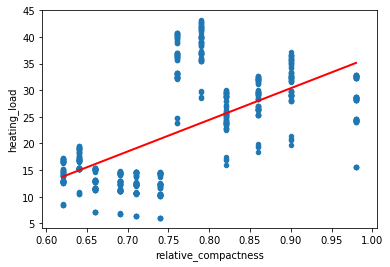

In [141]:
"""Plot the observed data then plot the least squares line."""

df_energy_efficiency.plot(kind='scatter', x='relative_compactness', y='heating_load')
plt.plot(X_new, presage, c='red', linewidth=2)

In [142]:
"""Confidence Intervals for the Model Coefficients"""

"""
Statsmodels calculates 95% confidence intervals for our model coefficients, interpreted thus: 
for every 100 times the population is sampled, approximately 95 (confidence intervals) would 
contain the "true" coefficient.
"""

lm.conf_int()

,0,1
Intercept,-27.138867,-18.967161
relative_compactness,54.062678,64.655427


In [143]:
"""Null Hypothesis Testing & Model Coefficients p-values"""

"""
If the 95% confidence interval includes zero, the p-value for that coefficient 
will be greater than 0.05. If the 95% confidence interval does not include zero, 
the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to 
decide whether there is likely a relationship between the feature and the response.

FINDINGS:
    
    1. The p-value for Relative Compactness is less than 0.05; ergo, there is a 
    correlation between Relative Compactness and Heating Load."""

lm.pvalues

Intercept               1.503456e-26
relative_compactness    1.591576e-83
dtype: float64

In [144]:
"""Get the R-squared value for the model."""

lm.rsquared

0.38722236193215909

In [145]:
"""Use multiple linear regression to make predictions."""

# create a fitted model with all three features
lm = smf.ols(formula='heating_load ~ relative_compactness + surface_area + wall_area + roof_area + overall_height + orientation + glazing_area + glazing_area_distribution', data=df_energy_efficiency).fit()

# print the coefficients
lm.params

Intercept                    84.013418
relative_compactness        -64.773432
surface_area                 -0.062606
wall_area                     0.036129
roof_area                    -0.049368
overall_height                4.169954
orientation                  -0.023330
glazing_area                 19.932736
glazing_area_distribution     0.203777
dtype: float64

In [146]:
"""
FINDINGS: 

    A given amount of the additional features (surface are	glazing area dist.), 
    results in a decrease in heating load (-64.7734320000000)0.0
"""
###############################################################################
"""Summarize Fitted Model"""

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           heating_load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:53:55   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    84.0134     19.034      4.414      0.000      46.649     121.378
relative_compactness        -64.7734     10.289     -6.295      0.000     -84.973     -44.574
surface_area                 -0.0626      0.013     -4.670      0.000      -0.089      -0.036
wall_area                     0.0361      0.004      9.386      0.000       0.029       0.044
roof_area                    -0.0494      0.008     -6.569      0.000      -0.064      -0.035
overall_height                4.1700      0.338     12.338      0.000       3.506       4.833
orientation                  -0.0233      0.095     -0.246      0.805      -0.209       0.163
glazing_area                 19.9327      0.814     24.488      0.000      18.335      21.531
glazing_area_distribution     0.2038      0.070      2.915      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.647   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.707
Skew:                           0.044   Prob(JB):                     6.49e-09
Kurtosis:                       4.082   Cond. No.                     5.54e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [147]:
"""
CONCLUSIONS:

    
    1. Orientation has no significant p-value, in contrast to the other features 
    (reject the null hypothesis for those features with significant p-values), and fail to 
    reject the null hypothesis for Orientation.
    2. Those features with significant p-values show a direct correlation with Heating Load; 
    Orientation has negative association. (However, this is irrelevant since we have failed 
    to reject the null hypothesis for Newspaper.)
    3. This model has a higher R-squared (0.916) than the previous model, indicating that 
    this model provides a better fit to the data than a model that only includes Relative Compactness.

#######################################################################################################

SOURCE:

http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) 
and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial 
and Applied Mathematics, University of Oxford, UK).

#######################################################################################################

FEATURES INFORMATION:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses 
(or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each 
of the two responses.

Specifically:

    X1 Relative Compactness
    X2 Surface Area
    X3 Wall Area
    X4 Roof Area
    X5 Overall Height
    X6 Orientation
    X7 Glazing Area
    X8 Glazing Area Distribution
    y1 Heating Load
    y2 Cooling Load

NOTE: 

    Feature names were changed to facilitate human readability.

#######################################################################################################

RELEVANT PAPERS:

    A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance 
    of residential buildings using statistical machine learning tools', Energy and
    Buildings, Vol. 49, pp. 560-567, 2012

#######################################################################################################

CITATIONS:

    1. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of 
    residential buildings using statistical machine learning tools', Energy and Buildings, 
    Vol. 49, pp. 560-567, 2012.

    For further details on the data analysis methodology:
    
    2. Tsanas, 'Accurate telemonitoring of Parkinson's disease symptom severity using nonlinear 
    speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012.
    
#######################################################################################################

ADDITIONAL SOURCES:

    1. Based upon this tutorial by Kevin Markham: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
"""

'\nCONCLUSIONS:\n\n    \n    1. Orientation has no significant p-value, in contrast to the other features \n    (reject the null hypothesis for those features with significant p-values), and fail to \n    reject the null hypothesis for Orientation.\n    2. Those features with significant p-values show a direct correlation with Heating Load; \n    Orientation has negative association. (However, this is irrelevant since we have failed \n    to reject the null hypothesis for Newspaper.)\n    3. This model has a higher R-squared (0.916) than the previous model, indicating that \n    this model provides a better fit to the data than a model that only includes Relative Compactness.\n\n'